In [1]:
pip install pytrends



     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------- ----- 51.2/59.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 798.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.2/11.5 MB 5.1 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.5 MB 6.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.5 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.5 MB 7.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.5 MB 6.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.5 MB 7.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.5 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/11.5 MB 7.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.5 MB 7.4 MB/s eta 0:00:02
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

pip install matplotlib



     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     ------ ------------------------------ 30.7/167.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  163.8/167.0 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB 8.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/7.8 MB 8.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/7.8 MB 7.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.8 MB 8.0 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.8 MB 7.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.8 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.8 MB 7.5 MB/s eta 0:00:01
   --------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Inisialisasi koneksi ke Google Trends
pytrends = TrendReq(hl='id', tz=360)

# Definisikan lima merek sepatu
kw_list = ["Nike", "Adidas", "Converse", "Vans", "Puma"]

# Ambil data tren untuk masing-masing merek dalam 5 tahun terakhir di Indonesia
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='ID', gprop='')

# Mengambil data minat pencarian dari waktu ke waktu
df_trend = pytrends.interest_over_time()
df_trend = df_trend.drop(columns=['isPartial'])  # Hapus kolom isPartial jika ada


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [16]:
# Hitung rata-rata minat pencarian untuk setiap merek
avg_interest = df_trend.mean()

# Urutkan rata-rata minat pencarian dari yang tertinggi ke yang terendah
ranked_interest = avg_interest.sort_values(ascending=False)

# Tampilkan hasil ranking
print("Ranking minat pencarian merek sepatu selama 5 tahun terakhir:")
print(ranked_interest)


Ranking minat pencarian merek sepatu selama 5 tahun terakhir:
Nike        42.034351
Adidas      23.687023
Converse    11.526718
Vans        10.458015
Puma         5.988550
dtype: float64


In [17]:
# Mengambil data minat berdasarkan wilayah (subregion)
df_region = pytrends.interest_by_region(resolution='CITY', inc_low_vol=True)

# Filter hanya untuk lima merek sepatu
df_region = df_region[kw_list]

# Urutkan data berdasarkan wilayah dengan minat tertinggi untuk setiap merek
ranked_regions = {}
for brand in kw_list:
    ranked_regions[brand] = df_region[brand].sort_values(ascending=False).head(5)

# Tampilkan hasil ranking berdasarkan wilayah
print("Ranking wilayah minat pencarian untuk setiap merek sepatu:")
for brand, regions in ranked_regions.items():
    print(f"\n{brand}:\n{regions}")


Ranking wilayah minat pencarian untuk setiap merek sepatu:

Nike:
geoName
Bengkulu             57
Gorontalo            56
Sulawesi Barat       55
Sulawesi Tengah      55
Sulawesi Tenggara    55
Name: Nike, dtype: int64

Adidas:
geoName
Jawa Tengah                      29
Daerah Khusus Ibukota Jakarta    29
Jawa Timur                       27
Sulawesi Selatan                 27
Jawa Barat                       27
Name: Adidas, dtype: int64

Converse:
geoName
Daerah Istimewa Yogyakarta    16
Sulawesi Utara                15
Jawa Tengah                   14
Jawa Timur                    13
Sumatera Selatan              13
Name: Converse, dtype: int64

Vans:
geoName
Daerah Istimewa Yogyakarta    15
Kalimantan Barat              13
Kepulauan Riau                12
Sumatera Utara                12
Maluku                        11
Name: Vans, dtype: int64

Puma:
geoName
Kalimantan Utara      7
Kalimantan Timur      7
Papua Barat           7
Maluku                7
Kalimantan Selatan    7
Name

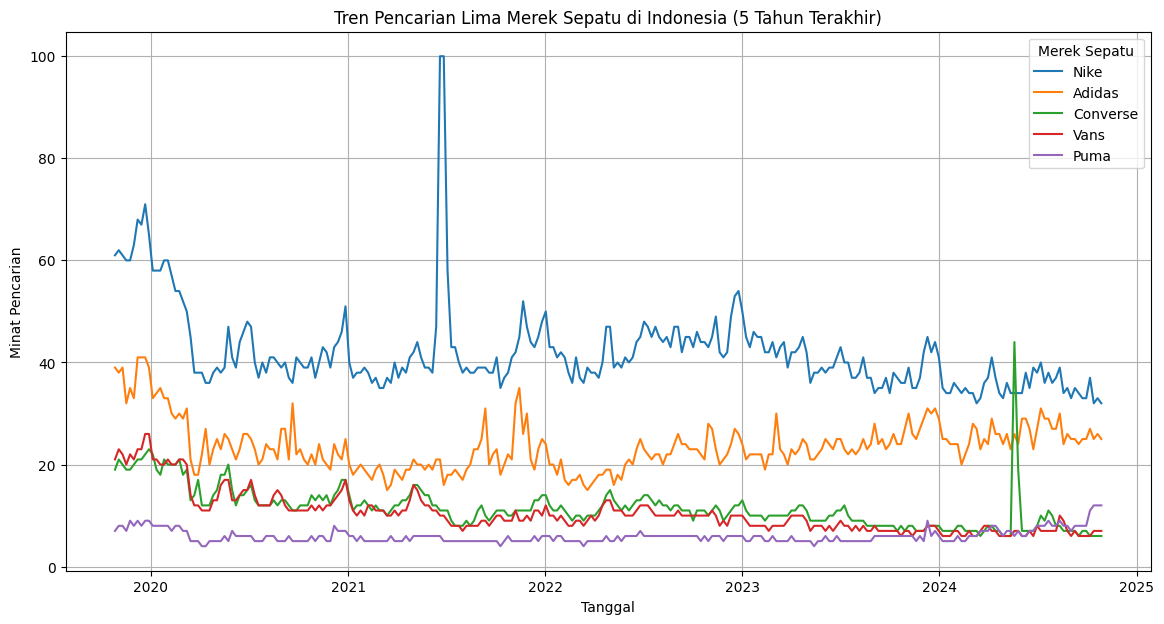

In [18]:
# Plot tren pencarian dari waktu ke waktu untuk masing-masing merek sepatu
plt.figure(figsize=(14, 7))
for brand in kw_list:
    plt.plot(df_trend.index, df_trend[brand], label=brand)

# Tambahkan detail visualisasi
plt.title('Tren Pencarian Lima Merek Sepatu di Indonesia (5 Tahun Terakhir)')
plt.xlabel('Tanggal')
plt.ylabel('Minat Pencarian')
plt.legend(title='Merek Sepatu')
plt.grid(True)
plt.show()


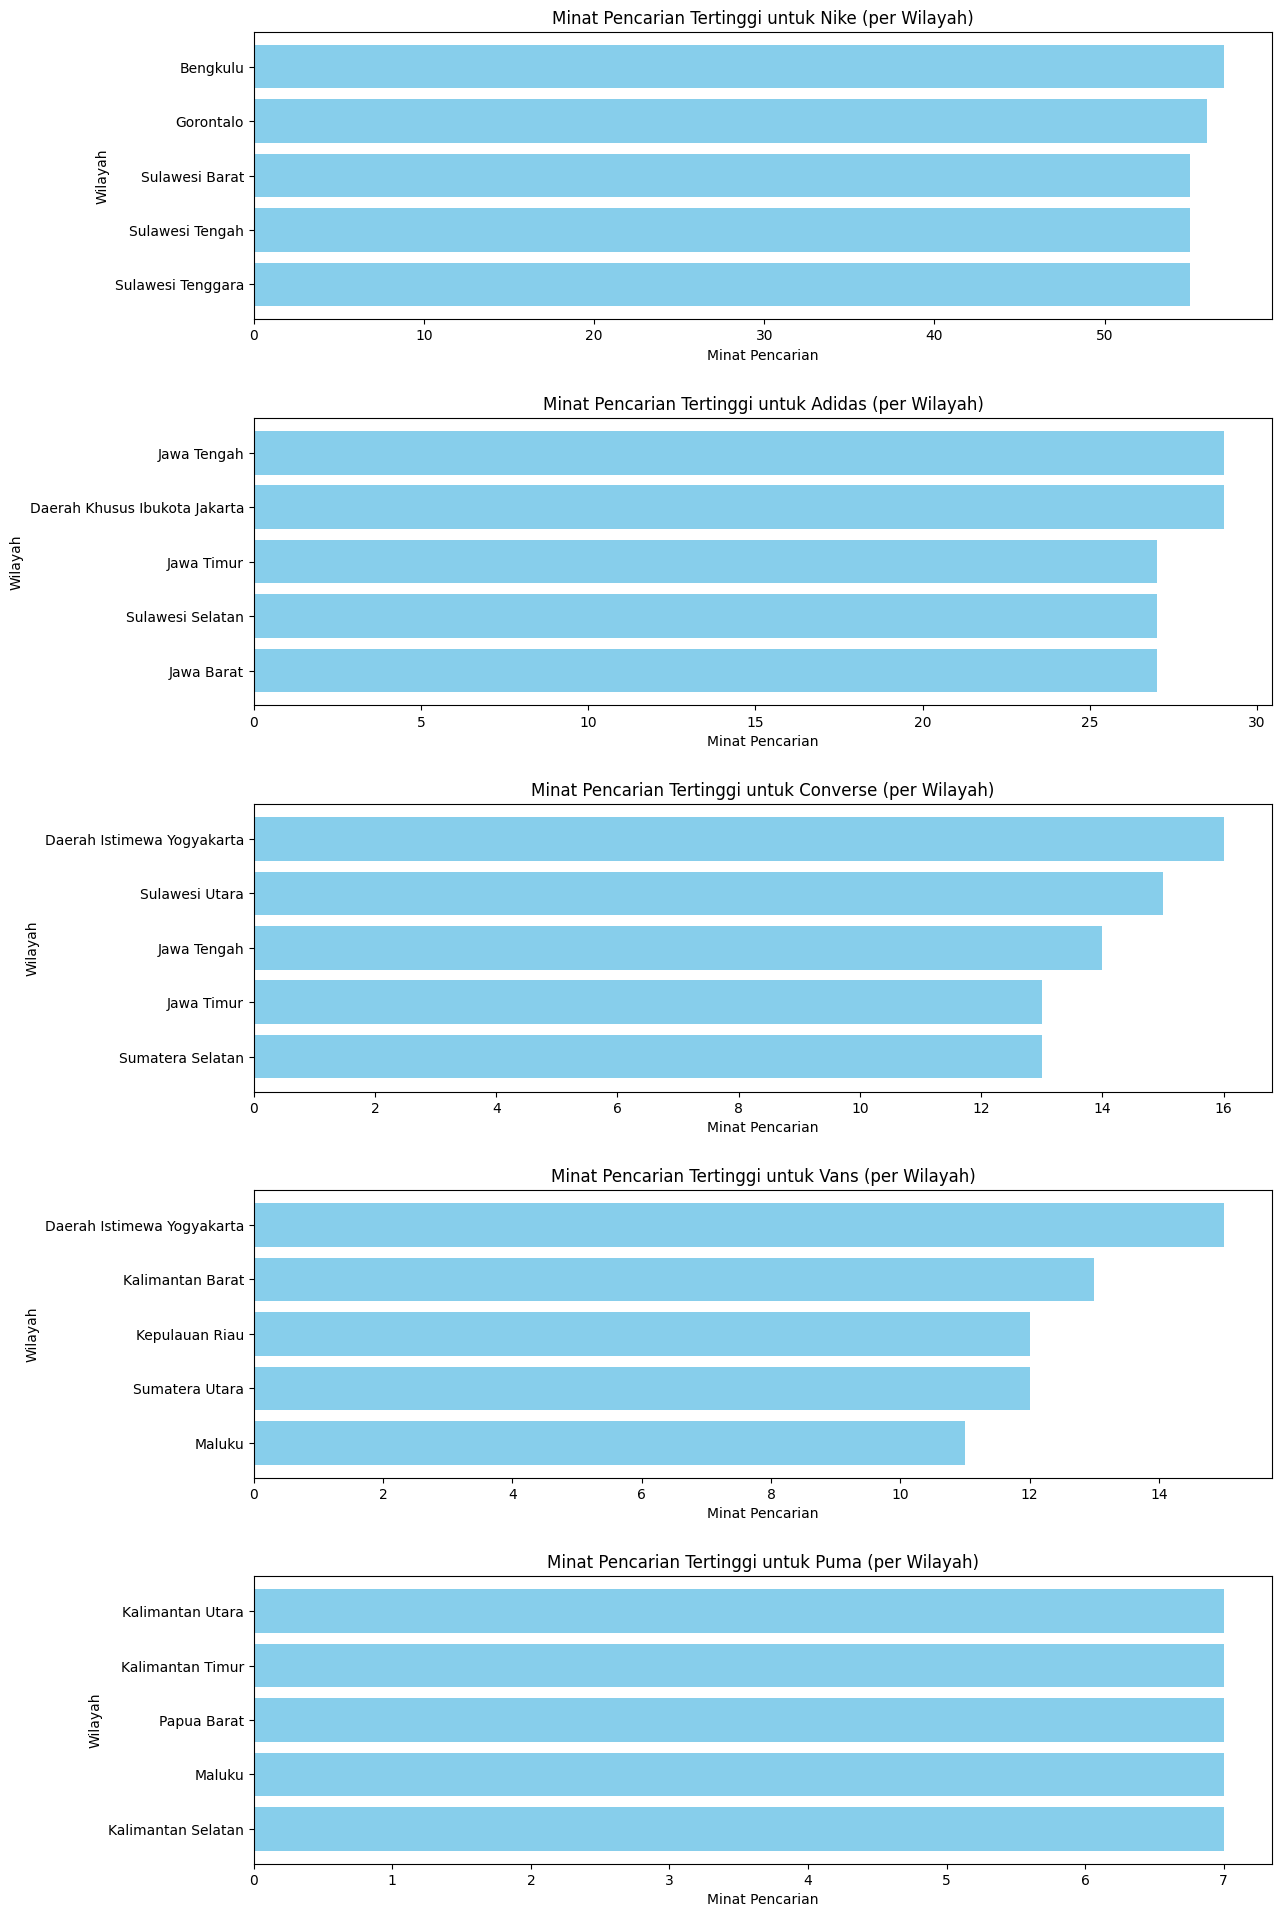

In [19]:
import numpy as np

# Menyiapkan subgrafik untuk tiap merek
fig, axes = plt.subplots(len(kw_list), 1, figsize=(12, 20))
fig.tight_layout(pad=5.0)

# Plot minat per wilayah untuk setiap merek
for i, brand in enumerate(kw_list):
    top_regions = ranked_regions[brand]
    axes[i].barh(top_regions.index, top_regions.values, color='skyblue')
    axes[i].invert_yaxis()  # Membalik sumbu y agar nilai tertinggi di atas
    axes[i].set_title(f"Minat Pencarian Tertinggi untuk {brand} (per Wilayah)")
    axes[i].set_xlabel("Minat Pencarian")
    axes[i].set_ylabel("Wilayah")

plt.show()
